<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Adaboost_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [119]:
df=pd.DataFrame()

In [120]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['lable']=[1,1,0,1,0,1,0,1,0,0]

In [121]:
df

,x1,x2,lable
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

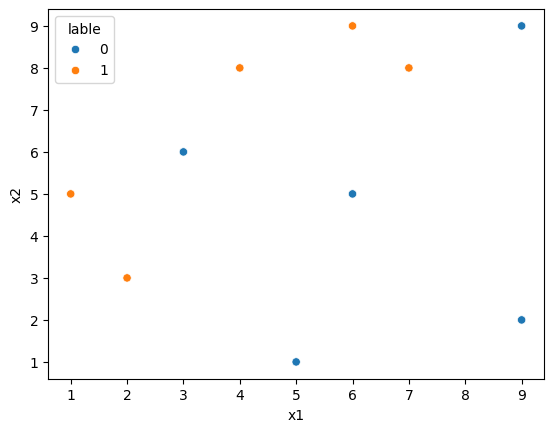

In [122]:
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['lable'])

In [123]:
df['weight']=1/df.shape[0]

In [124]:
df

,x1,x2,lable,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [125]:
dt=DecisionTreeClassifier(max_depth=1)

In [126]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [127]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

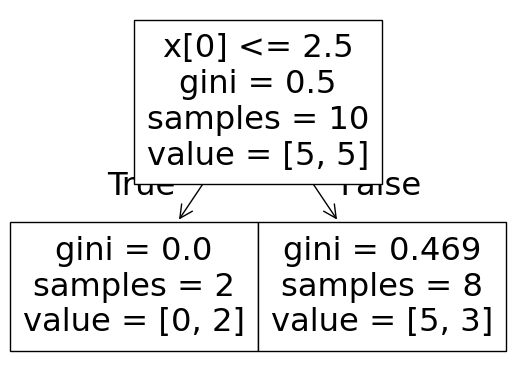

In [128]:
plot_tree(dt)

<Axes: >

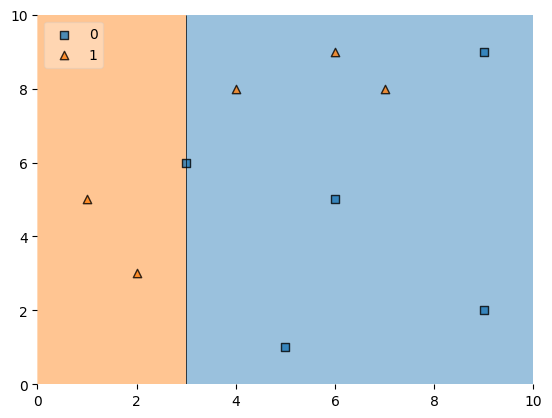

In [129]:
plot_decision_regions(X,y,clf=dt, legend=2)

In [130]:
df['predict']=dt.predict(X)

In [131]:
df

,x1,x2,lable,weight,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [132]:
def calculaate_weight_model(error):
  return 0.5*np.log((1-error)/(error))

In [133]:
apha1=calculaate_weight_model(0.3)
apha1

np.float64(0.42364893019360184)

In [134]:
def update_row_weight(row,alpha=0.42):
  if row['lable']==row['predict']:
    return row['weight']*np.exp(-alpha)
  else:
    return row['weight']*np.exp(alpha)

In [135]:
df['update_weight']=df.apply(update_row_weight,axis=1)

In [136]:
df

,x1,x2,lable,weight,predict,update_weight
0,1,5,1,0.1,1,0.065705
1,2,3,1,0.1,1,0.065705
2,3,6,0,0.1,0,0.065705
3,4,8,1,0.1,0,0.152196
4,5,1,0,0.1,0,0.065705
5,6,9,1,0.1,0,0.152196
6,6,5,0,0.1,0,0.065705
7,7,8,1,0.1,0,0.152196
8,9,9,0,0.1,0,0.065705
9,9,2,0,0.1,0,0.065705


In [137]:
sum=df['update_weight'].sum()
sum

np.float64(0.91652124055613)

In [138]:
df['normalized_weight']=df['update_weight']/sum

In [139]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight
0,1,5,1,0.1,1,0.065705,0.071689
1,2,3,1,0.1,1,0.065705,0.071689
2,3,6,0,0.1,0,0.065705,0.071689
3,4,8,1,0.1,0,0.152196,0.166059
4,5,1,0,0.1,0,0.065705,0.071689
5,6,9,1,0.1,0,0.152196,0.166059
6,6,5,0,0.1,0,0.065705,0.071689
7,7,8,1,0.1,0,0.152196,0.166059
8,9,9,0,0.1,0,0.065705,0.071689
9,9,2,0,0.1,0,0.065705,0.071689


In [140]:
df['normalized_weight'].sum()

np.float64(1.0)

In [141]:
df['cumsum_upper']=np.cumsum(df['normalized_weight'])

In [142]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper
0,1,5,1,0.1,1,0.065705,0.071689,0.071689
1,2,3,1,0.1,1,0.065705,0.071689,0.143378
2,3,6,0,0.1,0,0.065705,0.071689,0.215068
3,4,8,1,0.1,0,0.152196,0.166059,0.381126
4,5,1,0,0.1,0,0.065705,0.071689,0.452815
5,6,9,1,0.1,0,0.152196,0.166059,0.618874
6,6,5,0,0.1,0,0.065705,0.071689,0.690563
7,7,8,1,0.1,0,0.152196,0.166059,0.856622
8,9,9,0,0.1,0,0.065705,0.071689,0.928311
9,9,2,0,0.1,0,0.065705,0.071689,1.000000


In [143]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weight']

In [144]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,0,0.065705,0.071689,0.215068,0.143378
3,4,8,1,0.1,0,0.152196,0.166059,0.381126,0.215068
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,0,0.152196,0.166059,0.618874,0.452815
6,6,5,0,0.1,0,0.065705,0.071689,0.690563,0.618874
7,7,8,1,0.1,0,0.152196,0.166059,0.856622,0.690563
8,9,9,0,0.1,0,0.065705,0.071689,0.928311,0.856622
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [145]:
df[['x1','x2','lable','weight','update_weight','normalized_weight','cumsum_lower','cumsum_upper']]

,x1,x2,lable,weight,update_weight,normalized_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,0.065705,0.071689,0.000000,0.071689
1,2,3,1,0.1,0.065705,0.071689,0.071689,0.143378
2,3,6,0,0.1,0.065705,0.071689,0.143378,0.215068
3,4,8,1,0.1,0.152196,0.166059,0.215068,0.381126
4,5,1,0,0.1,0.065705,0.071689,0.381126,0.452815
5,6,9,1,0.1,0.152196,0.166059,0.452815,0.618874
6,6,5,0,0.1,0.065705,0.071689,0.618874,0.690563
7,7,8,1,0.1,0.152196,0.166059,0.690563,0.856622
8,9,9,0,0.1,0.065705,0.071689,0.856622,0.928311
9,9,2,0,0.1,0.065705,0.071689,0.928311,1.000000


In [146]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,0,0.065705,0.071689,0.215068,0.143378
3,4,8,1,0.1,0,0.152196,0.166059,0.381126,0.215068
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,0,0.152196,0.166059,0.618874,0.452815
6,6,5,0,0.1,0,0.065705,0.071689,0.690563,0.618874
7,7,8,1,0.1,0,0.152196,0.166059,0.856622,0.690563
8,9,9,0,0.1,0,0.065705,0.071689,0.928311,0.856622
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [147]:
def create_new_dataset(df):
  indices=[]

  for i in range(df.shape[0]):
    a=np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper'] >a and a >row['cumsum_lower']:
        indices.append(index)

  return indices


In [148]:
index_values=create_new_dataset(df)

In [149]:
index_values

[6, 5, 0, 5, 5, 1, 3, 6, 7, 5]

In [150]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,0,0.065705,0.071689,0.215068,0.143378
3,4,8,1,0.1,0,0.152196,0.166059,0.381126,0.215068
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,0,0.152196,0.166059,0.618874,0.452815
6,6,5,0,0.1,0,0.065705,0.071689,0.690563,0.618874
7,7,8,1,0.1,0,0.152196,0.166059,0.856622,0.690563
8,9,9,0,0.1,0,0.065705,0.071689,0.928311,0.856622
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [152]:
seacond_df=df.iloc[index_values,[0,1,2,3]]

In [153]:
seacond_df

,x1,x2,lable,weight
6,6,5,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1


In [154]:
dt1=DecisionTreeClassifier(max_depth=1)
X=seacond_df.iloc[:,0:2].values
y=seacond_df.iloc[:,2].values

In [155]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

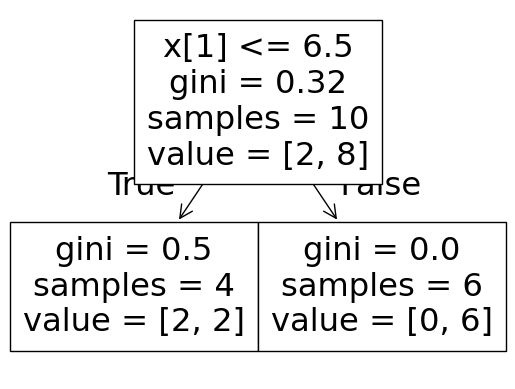

In [156]:
plot_tree(dt1)

<Axes: >

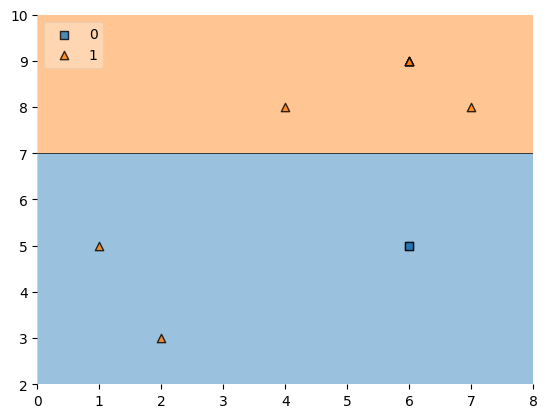

In [157]:
plot_decision_regions(X,y , clf=dt1,legend=2)

In [158]:
seacond_df['y_pred']=dt1.predict(X)

In [159]:
seacond_df

,x1,x2,lable,weight,y_pred
6,6,5,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1


In [160]:
apha2=calculaate_weight_model(0.1)
apha2

np.float64(1.0986122886681098)

In [163]:
def update_row_weights(row,alpha=1.09):
  if row['lable']==row['y_pred']:
    return row['weight']*np.exp(-alpha)
  else:
    return row['weight']*np.exp(alpha)

In [164]:
seacond_df['update_weight']=seacond_df.apply(update_row_weights,axis=1)

In [165]:
seacond_df

,x1,x2,lable,weight,y_pred,update_weight
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,0,0.297427
3,4,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [166]:
sum=seacond_df['update_weight'].sum()

In [167]:
seacond_df['Normalize']=seacond_df['update_weight']/sum

In [168]:
seacond_df

,x1,x2,lable,weight,y_pred,update_weight,Normalize
6,6,5,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,0,0.297427,0.344313
5,6,9,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,0,0.297427,0.344313
3,4,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922


In [169]:
seacond_df['cumsum_upper']=np.cumsum(seacond_df['Normalize'])


In [170]:
seacond_df['cumsum_lower']=seacond_df['cumsum_upper']-seacond_df['Normalize']

In [171]:
seacond_df


,x1,x2,lable,weight,y_pred,update_weight,Normalize,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.033622,0.038922,0.038922,0.000000
5,6,9,1,0.1,1,0.033622,0.038922,0.077843,0.038922
0,1,5,1,0.1,0,0.297427,0.344313,0.422157,0.077843
5,6,9,1,0.1,1,0.033622,0.038922,0.461078,0.422157
5,6,9,1,0.1,1,0.033622,0.038922,0.500000,0.461078
1,2,3,1,0.1,0,0.297427,0.344313,0.844313,0.500000
3,4,8,1,0.1,1,0.033622,0.038922,0.883235,0.844313
6,6,5,0,0.1,0,0.033622,0.038922,0.922157,0.883235
7,7,8,1,0.1,1,0.033622,0.038922,0.961078,0.922157
5,6,9,1,0.1,1,0.033622,0.038922,1.000000,0.961078


In [172]:
seacond_df[['x1','x2','lable','weight','update_weight','Normalize','cumsum_lower','cumsum_upper']]

,x1,x2,lable,weight,update_weight,Normalize,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0.033622,0.038922,0.000000,0.038922
5,6,9,1,0.1,0.033622,0.038922,0.038922,0.077843
0,1,5,1,0.1,0.297427,0.344313,0.077843,0.422157
5,6,9,1,0.1,0.033622,0.038922,0.422157,0.461078
5,6,9,1,0.1,0.033622,0.038922,0.461078,0.500000
1,2,3,1,0.1,0.297427,0.344313,0.500000,0.844313
3,4,8,1,0.1,0.033622,0.038922,0.844313,0.883235
6,6,5,0,0.1,0.033622,0.038922,0.883235,0.922157
7,7,8,1,0.1,0.033622,0.038922,0.922157,0.961078
5,6,9,1,0.1,0.033622,0.038922,0.961078,1.000000


In [173]:
def create_new_datasets(df):
  indices=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper'] >a and a >row['cumsum_lower']:
        indices.append(index)

  return indices


In [174]:
index_values=create_new_datasets(seacond_df)

In [175]:
index_values

[1, 1, 3, 0, 0, 5, 6, 0, 1, 1]

In [176]:
t_df=seacond_df.iloc[index_values,[0,1,2,3]]

In [177]:
t_df

,x1,x2,lable,weight
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [178]:
dt2=DecisionTreeClassifier(max_depth=1)
X=t_df.iloc[:,0:2].values
y=t_df.iloc[:,2].values

In [179]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

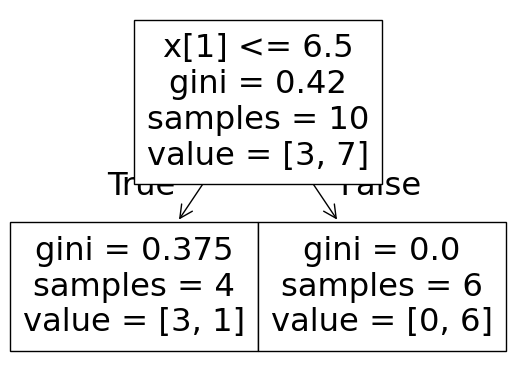

In [180]:
plot_tree(dt2)

<Axes: >

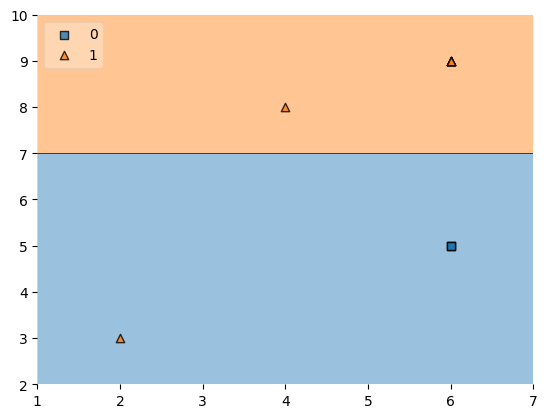

In [181]:
plot_decision_regions(X,y, clf=dt2,legend=2)

In [183]:
t_df['y_pred']=dt2.predict(X)

In [184]:
t_df

,x1,x2,lable,weight,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [185]:
apha3=calculaate_weight_model(0.1)
apha3

np.float64(1.0986122886681098)

In [186]:
query=np.array([1,5]).reshape(1,2)

In [187]:
dt.predict(query)

array([1])

In [188]:
dt1.predict(query)

array([0])

In [189]:
dt2.predict(query)

array([0])

In [195]:
apha1*1+apha2*-1+apha3*-1

np.float64(-1.7735756471426178)

In [197]:
np.sign(apha1*1+apha2*-1+apha3*-1)

np.float64(-1.0)

In [198]:
query=np.array([3,6]).reshape(1,2)

In [199]:
dt1.predict(query)

array([0])

In [200]:
dt2.predict(query)

array([0])

In [202]:
dt.predict(query)

array([0])